# CORRELATION

* We want to find out what are the variables that are positively and negatively correlated
* Also find out the correlation coefficient of the variables.

In [12]:
import pandas as pd
import sklearn 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import linregress

In [2]:
df=pd.read_csv(r'normalised_ds.csv')

In [3]:
df.head()

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,0,"""Weird Al"" Yankovic",-0.736213,0.724221,-0.222791,0.618786,-0.216518,0.149036,0.878972,0.636937,0.983660,-0.388475,1.027699,0.532356,1.981348,"['antiviral pop', 'comedy rock', 'comic', 'par..."
1,1,$pyda,-1.247542,-0.172369,1.260429,1.469640,1.403118,0.963913,0.103621,2.422532,-1.027318,0.985799,0.453173,0.532356,-0.272360,['others']
2,2,'Be More Chill' Ensemble,0.961542,-0.273452,-0.928038,-0.221218,2.083038,0.593679,-0.462369,0.698799,-0.092667,0.646726,-0.695878,0.532356,-0.272360,['others']
3,3,'In The Heights' Original Broadway Company,0.593076,-0.011826,0.875680,-0.506546,0.033978,0.229794,3.241227,-0.117258,-0.443615,0.340895,0.453173,0.532356,0.002902,"['broadway', 'show tunes']"
4,4,'Little Women' Original Broadway Cast,1.360628,-1.177249,0.527442,-0.814013,-0.928373,0.478023,-0.762832,-1.188734,-1.430823,0.081604,-1.270404,0.532356,-0.255156,['others']


<AxesSubplot:>

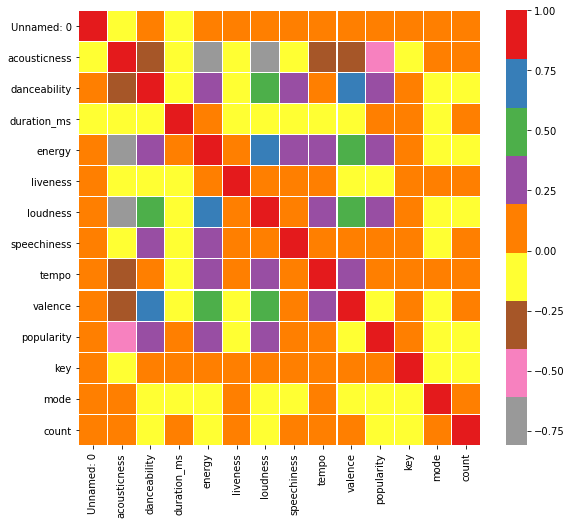

In [4]:
#using heatmaps to find how the variables are correlated
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="Set1_r", linewidths = 0.1) 

Inorder to get a clear idea of the correlation, we find the correlation coeffecient for all numeric variables with respect to each other

In [5]:
df=df.iloc[:,1:16]

In [6]:
df.corr()

,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
acousticness,1.000000,-0.380469,-0.095578,-0.811390,-0.056874,-0.650581,-0.144080,-0.262889,-0.276280,-0.475568,-0.053011,0.097569,0.056674
danceability,-0.380469,1.000000,-0.089324,0.369373,-0.114878,0.471797,0.199694,0.080868,0.630854,0.213027,0.041167,-0.095601,-0.038296
duration_ms,-0.095578,-0.089324,1.000000,0.006693,-0.018405,-0.056016,-0.056762,-0.029464,-0.177551,0.018551,0.010043,-0.071449,0.002960
energy,-0.811390,0.369373,0.006693,1.000000,0.140572,0.797201,0.215997,0.318403,0.425969,0.361566,0.053627,-0.080312,-0.047626
liveness,-0.056874,-0.114878,-0.018405,0.140572,1.000000,0.078667,0.095844,0.007364,-0.008082,-0.062273,-0.001395,0.023206,0.026881
loudness,-0.650581,0.471797,-0.056016,0.797201,0.078667,1.000000,0.171771,0.295638,0.400225,0.312821,0.043632,-0.045144,-0.038096
speechiness,-0.144080,0.199694,-0.056762,0.215997,0.095844,0.171771,1.000000,0.091467,0.120214,0.033364,0.010459,-0.047502,0.040398
tempo,-0.262889,0.080868,-0.029464,0.318403,0.007364,0.295638,0.091467,1.000000,0.213800,0.088865,0.014440,-0.001443,-0.003538
valence,-0.276280,0.630854,-0.177551,0.425969,-0.008082,0.400225,0.120214,0.213800,1.000000,-0.072625,0.041807,-0.009222,0.005988
popularity,-0.475568,0.213027,0.018551,0.361566,-0.062273,0.312821,0.033364,0.088865,-0.072625,1.000000,0.023923,-0.118735,-0.129343


## plotting the corelation coefficients for the variables that have coefficient greater than 0.5 and lesser than -0.50

correlation coefficeint along with its p-value is:  (-0.8113896738460284, 0.0)


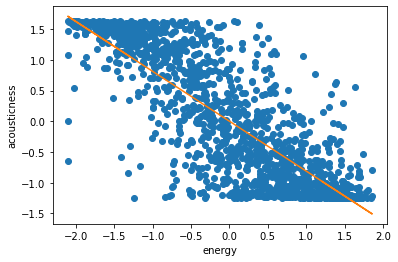

In [46]:
data1=df['acousticness']
data2=df['energy']

plt.plot(data2[4796:6208], data1[4796:6208], 'o')
m, b = np.polyfit(data2, data1, 1)
plt.plot(data2[4796:6208], m*(data2[4796:6208])+b)
plt.xlabel('energy')
plt.ylabel('acousticness')
print("correlation coefficeint along with its p-value is: ",pearsonr(data1, data2))

correlation coefficeint along with its p-value is:  (-0.6505809654228952, 0.0)
slope is  -0.6505809654228956


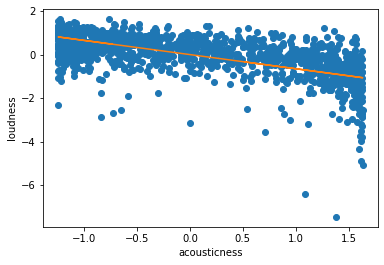

In [44]:
data1=df['acousticness']
data2=df['loudness']
plt.plot(data1[4796:6208], data2[4796:6208], 'o')
m, b = np.polyfit(data1, data2, 1)
plt.plot(data1, m*(data1)+b)
plt.xlabel('acousticness')
plt.ylabel('loudness')
print("correlation coefficeint along with its p-value is: ",pearsonr(data1, data2))
slope, intercept, r, p, std_err = linregress(data1, data2)
print("slope is ",slope)

correlation coefficeint along with its p-value is:  (0.6308539195809072, 0.0)
slope is  0.6308539195809072


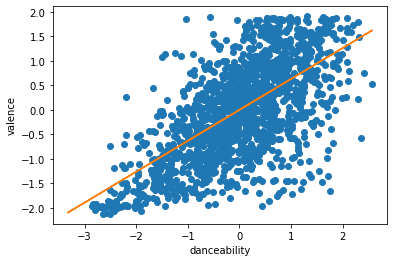

In [48]:
data1=df['danceability']
data2=df['valence']
plt.plot(data1[2894:4456], data2[2894:4456], 'o')
m, b = np.polyfit(data1, data2, 1)
plt.plot(data1, m*(data1)+b)
plt.xlabel('danceability')
plt.ylabel('valence')
print("correlation coefficeint along with its p-value is: ",pearsonr(data1, data2))
slope, intercept, r, p, std_err = linregress(data1, data2)
print("slope is ",slope)

correlation coefficeint along with its p-value is:  (0.79720064174697, 0.0)
slope is  0.7972006417469705


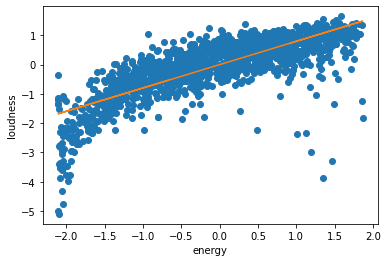

In [49]:
data1=df['energy']
data2=df['loudness']
plt.plot(data1[11894:13356], data2[11894:13356], 'o')
m, b = np.polyfit(data1, data2, 1)
plt.plot(data1[11894:13356], m*(data1[11894:13356])+b)
plt.xlabel('energy')
plt.ylabel('loudness')
print("correlation coefficeint along with its p-value is: ",pearsonr(data1, data2))
slope, intercept, r, p, std_err = linregress(data1, data2)
print("slope is ",slope)

# INFERENCES
* Accousticness and loudness are negatively corellated. They have a moderately high correlation coefficient and hence can be used for linear regression models. As the loudness of a song increases, it has a lesser probablity of being acoustic
* Accousticness and loudness have a negative corelation hence as loudness increases, the confidence level of the song having acoustic instruments decreases.
* Danciblity and valence are positively correlated with a coeffecient of 0.63. This means that as the song gets more dancier, more positive and cheerfull is the song. We can safely conclude that slower songs are more prone to having sad lyrics
* Loudness and energy are positively correlated with a coefficient of 0.80. This means that as the loudness of a song increses, its energy also increases


We also noticed that for normalised data, the slope of the  linear regression line and the correlation value are the same.